## Worksheet 7

### Group 22 Eaton Heidegger and Shannon Schröder

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Poisson equation
#### N-body gravity solver

a)  Generate a model cluster of N stars (choose N as large as is feasible given your computational
 resources, e.g. N = 1000). Compute the 3D gravitational potential of the sampled cluster using
 the Green’s function approach. The analytical solution to the potential of a Plummer sphere
 is (in ‘N-body units’)

Greens function approach: 

If you have a linear differential equation of the form:
$L u(x) = f(x)$

where:

- $L$ is a linear differential operator (like the Laplacian $\nabla^2$ or a time derivative),
- $u(x)$ is the unknown function,
- $f(x)$ is a known source function,

then the Green’s function $G(x, x')$ is the solution to:

$L G(x, x') = \delta(x - x')$

where $\delta(x - x')$ is the Dirac delta function, representing a point source at position x'. 


(-10.0, 10.0)

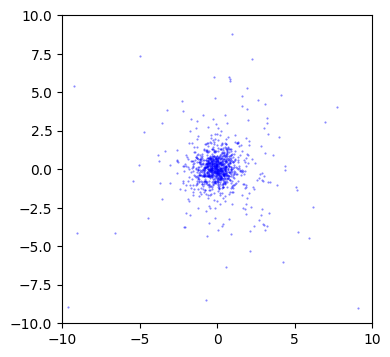

In [13]:
# Sample Plumber from provided Notebook :

# initialise the random number generator
rng = np.random.Generator(np.random.PCG64(seed=12345))

# Sample isotropic 3d vectors with a given modulus
def rand_vec3d( mod ):
    N = len(mod)
    phi = 2*np.pi*rng.random(size=N)
    theta = np.arccos( 2*rng.random(size=N)-1 )
    v3d = np.zeros( (N,3) )
    v3d[:,0] = mod * np.cos( phi ) * np.sin( theta )
    v3d[:,1] = mod * np.sin( phi ) * np.sin( theta )
    v3d[:,2] = mod * np.cos( theta )
    # subtract mean
    for i in range(3):
        v3d[:,i] -= np.mean(v3d[:,i])
    return v3d

# number of stars
N = 1000

# particle mass is 1/N
m = 1/N

# Sampling the mass, draw radii through inversion sampling from the cumulative mass M
U = rng.random(size=N)
rsamp = U**(1/3)/np.sqrt((1-U**(2/3)))

# create N empty 3D vectors
x3d = rand_vec3d( rsamp )

# make a scatter plot of the stars
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(x3d[:,0], x3d[:,1], marker='.', s=1, c='b', alpha=0.5)
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)

In [15]:
def compute_potential( x3d, m, eps=0.1 ):
    N = len(x3d)
    V = np.zeros(N)
    for i in range(N):
        dx = x3d - x3d[i]
        r = np.linalg.norm(dx, axis=1) + eps
        V[i] = -np.sum(m / r)
    return V 
def plummer_potential( x3d, m, eps=0.1 ):
    r = np.linalg.norm(x3d, axis=1) + eps
    V = -np.sum(m / np.sqrt(r**2 + eps**2))
    return V

(-10.0, 10.0)

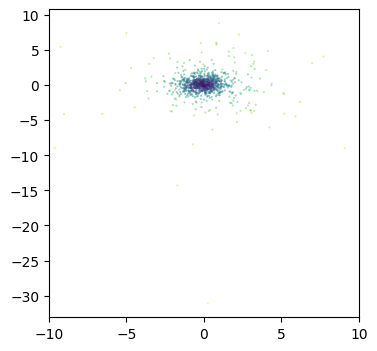

In [18]:
# compare the potential of the Plummer model with the potential of the stars
Vstars = compute_potential( x3d, m )

# Plot the potential of the stars
fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(x3d[:,0], x3d[:,1], marker='.', s=1, c=Vstars, alpha=0.5)
ax.set_xlim(-10, 10)

In [20]:
# just trying out things:
# Compute Green's function potential at each star's position
def compute_potential(positions, m):
    N = positions.shape[0]
    potential = np.zeros(N)
    for i in range(N):
        diff = positions[i] - positions
        r_ij = np.linalg.norm(diff, axis=1)
        r_ij[i] = np.inf  # Avoid self-interaction
        potential[i] = -np.sum(m / r_ij)
    return potential

# Compute potentials
computed_potential = compute_potential(x3d, m)

# Compute analytical Plummer potential at each position
radii = np.linalg.norm(x3d, axis=1)
plummer_potential = -1 / np.sqrt(1 + radii**2)

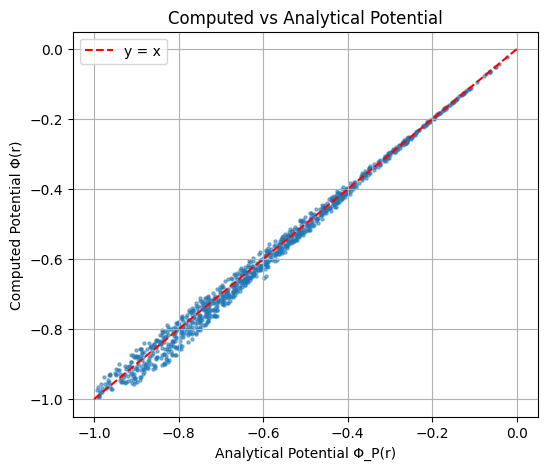

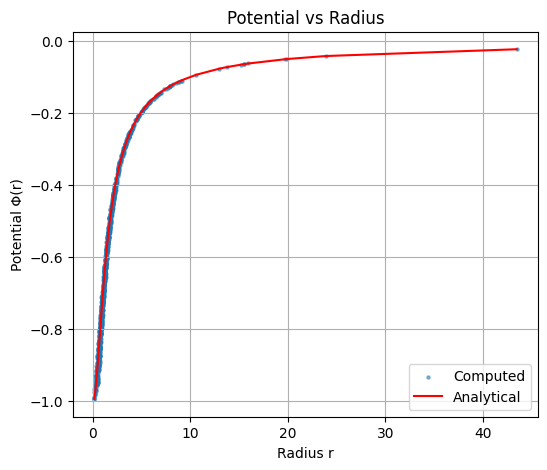

In [27]:
# Create scatter plots of computed vs. analytical potential and potential vs. radius
fig1, ax1 = plt.subplots(figsize=(6, 5))
ax1.scatter(plummer_potential, computed_potential, s=5, alpha=0.5)
ax1.plot([-1, 0], [-1, 0], color='red', linestyle='--', label='y = x')
ax1.set_xlabel('Analytical Potential Φ_P(r)')
ax1.set_ylabel('Computed Potential Φ(r)')
ax1.set_title('Computed vs Analytical Potential')
ax1.legend()
ax1.grid(True)

fig2, ax2 = plt.subplots(figsize=(6, 5))
ax2.scatter(radii, computed_potential, s=5, alpha=0.5, label='Computed')
ax2.plot(np.sort(radii), -1 / np.sqrt(1 + np.sort(radii)**2), color='red', label='Analytical')
ax2.set_xlabel('Radius r')
ax2.set_ylabel('Potential Φ(r)')
ax2.set_title('Potential vs Radius')
ax2.legend()
ax2.grid(True)

plt.show()


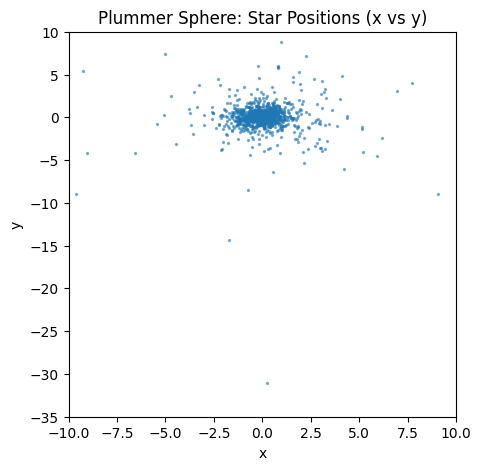

In [24]:
# Create a scatter plot of the star positions (x vs. y) to compare with the provided reference image
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(x3d[:, 0], x3d[:, 1], s=2, alpha=0.5)
ax.set_xlim(-10, 10)
ax.set_ylim(-35, 10)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Plummer Sphere: Star Positions (x vs y)")
plt.show()


Compute the potential numerically via Green's function

The Green's functiton for gravitational potential is: 

$\Phi(r) = - \sum_{j \neq i} \frac{Gm}{|r_i - r_j|}$

In N body units: G=1, m=1/N (used WS 5)


In [10]:
# Numerical potential
def compute_potential(positions):
    N = len(positions)
    m = 1 / N
    potentials = np.zeros(N)

    for i in range(N):
        diff = positions[i] - positions
        r = np.linalg.norm(diff, axis=1)
        r[i] = np.inf
        potentials[i] = -m * np.sum(1 / r)

    return potentials


# other solution
'''def compute_potential( x3d, m, eps=0.1 ):
    N = len(x3d)
    V = np.zeros(N)
    for i in range(N):
        dx = x3d - x3d[i]
        r = np.linalg.norm(dx, axis=1) + eps
        V[i] = -np.sum(m / r)
    return V'''

'def compute_potential( x3d, m, eps=0.1 ):\n    N = len(x3d)\n    V = np.zeros(N)\n    for i in range(N):\n        dx = x3d - x3d[i]\n        r = np.linalg.norm(dx, axis=1) + eps\n        V[i] = -np.sum(m / r)\n    return V'

Compute the analytical Plummer potential: 

$\Phi_P(r_i) = - \frac{1}{\sqrt{1+r_1^2}}$

In [11]:
# Compute the analytical Plummer potential
def compute_analytical_potential(positions):
    r = np.linalg.norm(positions, axis=1)
    return -1 / np.sqrt(1 + r**2)



# other solution
'''def plummer_potential( x3d, m, eps=0.1 ):
    r = np.linalg.norm(x3d, axis=1) + eps
    V = -np.sum(m / np.sqrt(r**2 + eps**2))
    return V'''

'def plummer_potential( x3d, m, eps=0.1 ):\n    r = np.linalg.norm(x3d, axis=1) + eps\n    V = -np.sum(m / np.sqrt(r**2 + eps**2))\n    return V'

Text(0.5, 1.0, 'Potential vs Radius')

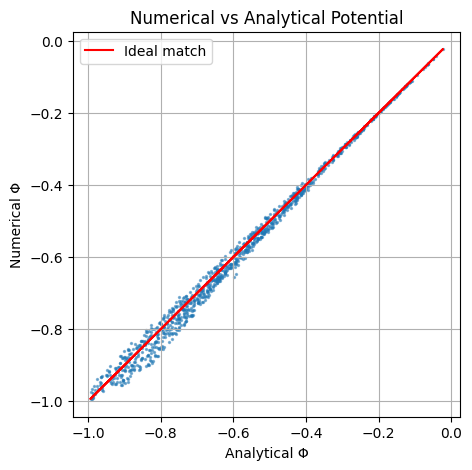

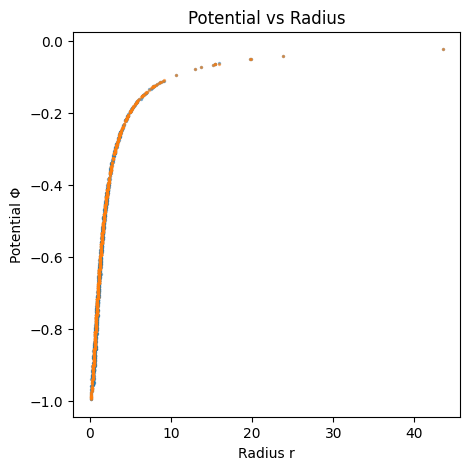

In [12]:
# Compute numerical and analytical potentials
phi_numerical = compute_potential(x3d)
phi_analytical = compute_analytical_potential(x3d)
radii = np.linalg.norm(x3d, axis=1)

# Plot: numerical vs analytical potential
plt.figure(figsize=(5, 5))
plt.scatter(phi_analytical, phi_numerical, s=2, alpha=0.5)
plt.plot(phi_analytical, phi_analytical, 'r', label='Ideal match')
plt.xlabel('Analytical Φ')
plt.ylabel('Numerical Φ')
plt.title('Numerical vs Analytical Potential')
plt.grid(True)
plt.legend()

# Plot: potential as a function of radius
plt.figure(figsize=(5, 5))
plt.scatter(radii, phi_numerical, s=2, alpha=0.5, label='Numerical')
plt.scatter(radii, phi_analytical, s=2, alpha=0.5, label='Analytical')
plt.xlabel('Radius r')
plt.ylabel('Potential Φ')
plt.title('Potential vs Radius')
